In [199]:
# Reference: https://medium.com/@abirj/text-analysis-and-classification-of-reviews-in-python-f4859e68b6cb
# Reference: https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704

import pandas as pd 
import numpy as np 

def get_reviews():
    DATA_ROOT = 'data'
    REVIEWS_FNAME = 'olist_order_reviews_dataset.csv'
    REVIEWS_FPATH = f'{DATA_ROOT}/{REVIEWS_FNAME}'
    df = pd.read_csv(REVIEWS_FPATH)
    return df 

df = get_reviews()
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [200]:
def filter_reviews(df):
    # Select the columns of interest
    df = df.loc[:, ['review_id', 'review_score', 'review_comment_title', 'review_comment_message']]

    # Filter the rows where the 'review_comment_message' column is not null
    df_filtered = df[df['review_comment_message'].notnull()]
    df_filtered = df_filtered.drop_duplicates(subset='review_id', inplace=False)
    return df_filtered

df_filtered = filter_reviews(df)
df_filtered

,review_id,review_score,review_comment_title,review_comment_message
3,e64fb393e7b32834bb789ff8bb30750e,5,NaN,Recebi bem antes do prazo estipulado.
4,f7c4243c7fe1938f181bec41a392bdeb,5,NaN,Parabéns lojas lannister adorei comprar pela I...
9,8670d52e15e00043ae7de4c01cc2fe06,4,recomendo,aparelho eficiente. no site a marca do aparelh...
12,4b49719c8a200003f700d3d986ea1a19,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,3948b09f7c818e2d86c9a546758b2335,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes..."
...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,4,NaN,para este produto recebi de acordo com a compr...
99208,df5fae90e85354241d5d64a8955b2b09,5,NaN,Entregou dentro do prazo. O produto chegou em ...
99215,a709d176f59bc3af77f4149c96bae357,3,NaN,"O produto não foi enviado com NF, não existe v..."
99221,b3de70c89b1510c4cd3d0649fd302472,5,NaN,"Excelente mochila, entrega super rápida. Super..."


In [201]:
def transform_df(df):
    transformed_df = df.copy()
    # Concatenate the strings in the 'review_comment_title' and 'review_comment_message' columns into a new column 'review_comment'
    transformed_df['review_comment'] = transformed_df.loc[:, ['review_comment_title', 'review_comment_message']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
    
    # Drop medium reviews
    transformed_df = transformed_df[transformed_df['review_score'] != 3]
    
    transformed_df['positively_rated'] = np.where(transformed_df['review_score'] > 3, 1, 0)

    # Drop the 'review_comment_title', 'review_score' and 'review_comment_message' columns
    transformed_df.drop(['review_comment_title', 'review_comment_message', 'review_score'], axis=1, inplace=True)
    return transformed_df.reset_index(drop=True)
    
transformed_df = transform_df(df_filtered)
transformed_df

,review_id,review_comment,positively_rated
0,e64fb393e7b32834bb789ff8bb30750e,Recebi bem antes do prazo estipulado.,1
1,f7c4243c7fe1938f181bec41a392bdeb,Parabéns lojas lannister adorei comprar pela I...,1
2,8670d52e15e00043ae7de4c01cc2fe06,recomendo aparelho eficiente. no site a marca ...,1
3,4b49719c8a200003f700d3d986ea1a19,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",1
4,3948b09f7c818e2d86c9a546758b2335,"Super recomendo Vendedor confiável, produto ok...",1
...,...,...,...
37134,5085bc489aa6b58a29c4f922d59ff826,Tive um problema na entrega em que o correio c...,0
37135,98fffa80dc9acbde7388bef1600f3b15,para este produto recebi de acordo com a compr...,1
37136,df5fae90e85354241d5d64a8955b2b09,Entregou dentro do prazo. O produto chegou em ...,1
37137,b3de70c89b1510c4cd3d0649fd302472,"Excelente mochila, entrega super rápida. Super...",1


In [202]:
import re
from unidecode import unidecode

def sanitize(text):
    text = text.lower()    
    # Remove any non-word characters from text
    text = re.sub(r'\W+', ' ', text)
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    #Normalize
    text = unidecode(text)
    list_text = text.split()
    text = ' '.join([word for word in list_text if word.isalpha()])
    return text

def clean_comments(df):
    df['review_comment'] = df['review_comment'].apply(sanitize)
    return df

cleaned_df = clean_comments(transformed_df)
cleaned_df

,review_id,review_comment,positively_rated
0,e64fb393e7b32834bb789ff8bb30750e,recebi bem antes do prazo estipulado,1
1,f7c4243c7fe1938f181bec41a392bdeb,parabens lojas lannister adorei comprar pela i...,1
2,8670d52e15e00043ae7de4c01cc2fe06,recomendo aparelho eficiente no site marca do ...,1
3,4b49719c8a200003f700d3d986ea1a19,mas um pouco travando pelo valor ta boa,1
4,3948b09f7c818e2d86c9a546758b2335,super recomendo vendedor confiavel produto ok ...,1
...,...,...,...
37134,5085bc489aa6b58a29c4f922d59ff826,tive um problema na entrega em que correio col...,0
37135,98fffa80dc9acbde7388bef1600f3b15,para este produto recebi de acordo com compra ...,1
37136,df5fae90e85354241d5d64a8955b2b09,entregou dentro do prazo produto chegou em con...,1
37137,b3de70c89b1510c4cd3d0649fd302472,excelente mochila entrega super rapida super r...,1


# Checking if is balanced

In [203]:
cleaned_df['positively_rated'].value_counts()

1    26380
0    10759
Name: positively_rated, dtype: int64

In [204]:
def balance_classes(df, column_name):
    """Balance the classes of a binary column in a dataframe."""
    counts = df[column_name].value_counts()
    # Check if classes are already balanced
    if counts.min() == counts.max():
        return df
    # Identify majority and minority classes
    majority_class = counts.idxmax()
    minority_class = counts.idxmin()
    # Randomly select instances from majority class to remove
    majority_indices = df[df[column_name] == majority_class].index
    num_instances_to_remove = len(majority_indices) - counts[minority_class]
    indices_to_remove = np.random.choice(majority_indices, size=num_instances_to_remove, replace=False)
    # Remove instances from majority class
    df = df.drop(indices_to_remove)
    return df

In [205]:
balanced_df = balance_classes(cleaned_df, 'positively_rated').reset_index(drop=True)
balanced_df

,review_id,review_comment,positively_rated
0,f7c4243c7fe1938f181bec41a392bdeb,parabens lojas lannister adorei comprar pela i...,1
1,8670d52e15e00043ae7de4c01cc2fe06,recomendo aparelho eficiente no site marca do ...,1
2,3948b09f7c818e2d86c9a546758b2335,super recomendo vendedor confiavel produto ok ...,1
3,9314d6f9799f5bfba510cc7bcd468c01,gostaria de saber que houve sempre recebi essa...,0
4,373cbeecea8286a2b66c97b1b157ec46,nao chegou meu produto pessimo,0
...,...,...,...
21513,2ee221b28e5b6fceffac59487ed39348,foto enganosa foto muito diferente principalme...,0
21514,7047578adefcc7c27319e3cf91ba1416,produto original prazo de entrega rapido super...,1
21515,5085bc489aa6b58a29c4f922d59ff826,tive um problema na entrega em que correio col...,0
21516,b3de70c89b1510c4cd3d0649fd302472,excelente mochila entrega super rapida super r...,1


In [206]:
balanced_df['positively_rated'].value_counts()

1    10759
0    10759
Name: positively_rated, dtype: int64

# Preprocessing: 

## remove stop words, apply lemmatization

In [207]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# define stopwords and stemmer for Brazilian Portuguese
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /home/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/daniel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [208]:
#!python3 -m spacy download pt_core_news_sm
import spacy
nlp = spacy.load("pt_core_news_sm")

In [209]:
def tokenize(text):
    # tokenize text into words
    tokens = word_tokenize(text, language='portuguese')
    # remove stop words and words with length less than 3
    tokens = [token for token in tokens if token.lower() not in stop_words and len(token) > 2]
    return tokens

def lemmatize(text: str):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return lemmas

def preprocess_text(text: str):
    tokens = tokenize(text)
    lemmatized = lemmatize(" ".join(tokens))
    return " ".join(lemmatized)

text = cleaned_df['review_comment'][11]
tokens = tokenize(text)
print(f'Text: "{text}"\n')
print(f'Tokens: {tokens}\n')
print(f'Lemmatized: {lemmatize(" ".join(tokens))}\n')
print(f'Pré-processed: "{preprocess_text(text)}"')

Text: "nao gostei comprei gato por lebre"

Tokens: ['nao', 'gostei', 'comprei', 'gato', 'lebre']

Lemmatized: ['nao', 'gostar', 'compr', 'gato', 'lebre']

Pré-processed: "nao gostar compr gato lebre"


In [210]:
preprocessed_df = balanced_df.copy()
preprocessed_df['preprocessed_comment'] = preprocessed_df['review_comment'].apply(preprocess_text)

In [211]:
preprocessed_df

,review_id,review_comment,positively_rated,preprocessed_comment
0,f7c4243c7fe1938f181bec41a392bdeb,parabens lojas lannister adorei comprar pela i...,1,parabem loja lannister adorar comprar Internet...
1,8670d52e15e00043ae7de4c01cc2fe06,recomendo aparelho eficiente no site marca do ...,1,recomendar aparelho eficiente site marca apare...
2,3948b09f7c818e2d86c9a546758b2335,super recomendo vendedor confiavel produto ok ...,1,super recomendo vendedor confiavel produto ent...
3,9314d6f9799f5bfba510cc7bcd468c01,gostaria de saber que houve sempre recebi essa...,0,gostar saber sempre recebir compra agora decpc...
4,373cbeecea8286a2b66c97b1b157ec46,nao chegou meu produto pessimo,0,nao chegar produto pessimo
...,...,...,...,...
21513,2ee221b28e5b6fceffac59487ed39348,foto enganosa foto muito diferente principalme...,0,foto enganoso foto diferente principalmente gr...
21514,7047578adefcc7c27319e3cf91ba1416,produto original prazo de entrega rapido super...,1,produto original prazo entregar rapir super sa...
21515,5085bc489aa6b58a29c4f922d59ff826,tive um problema na entrega em que correio col...,0,problema entregar correio colocar site entrega...
21516,b3de70c89b1510c4cd3d0649fd302472,excelente mochila entrega super rapida super r...,1,excelente mochila entregar super rapir super r...


In [212]:
from sklearn.model_selection import train_test_split
# Split the dataset into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(preprocessed_df['preprocessed_comment'], preprocessed_df['positively_rated'], test_size=0.4, random_state=42)

# Logistic Regression

In [213]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(x_train)

In [214]:
# transform the documents in the training data to a document-term matrix
x_train_vectorized = vect.transform(x_train)

In [215]:
from sklearn.linear_model import LogisticRegression #, SGDClassifier
model = LogisticRegression(max_iter=1000)
model.fit(x_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [216]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
predictions = model.predict(vect.transform(x_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

AUC:  0.9217896321627062


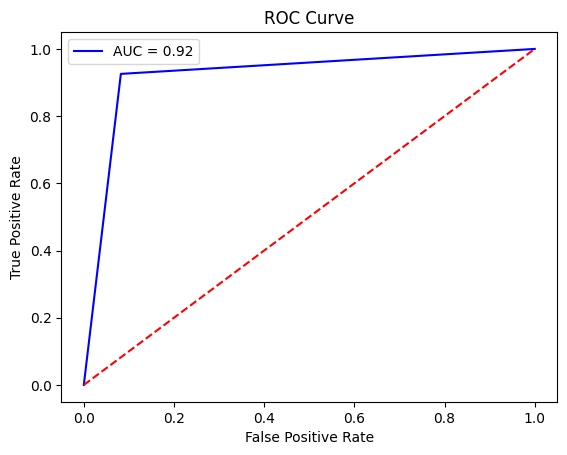

In [217]:
import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [218]:
for i in range(3,9):
    text = cleaned_df['review_comment'][i]
    is_positive = 'positive' if model.predict(vect.transform([text]))[0] else 'negative'
    print(f'{is_positive}: {text}')


positive: mas um pouco travando pelo valor ta boa
positive: super recomendo vendedor confiavel produto ok entrega antes do prazo
negative: gostaria de saber que houve sempre recebi essa compra agora me decpcionou
negative: nao chegou meu produto pessimo
positive: otimo loja nota
positive: obrigado pela atencao amim dispensada


# TF-IDF

In [219]:
# Fit the CountVectorizer to the training data specifiying a 
# minimum document frequency of 5 and extracting 1-gram, 2-gram and 3-gram
vect = CountVectorizer(min_df=5, ngram_range=(1,3)).fit(x_train)
x_train_vectorized = vect.transform(x_train)
model = LogisticRegression(max_iter=1000)
model.fit(x_train_vectorized, y_train)
predictions = model.predict(vect.transform(x_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9264075459540186


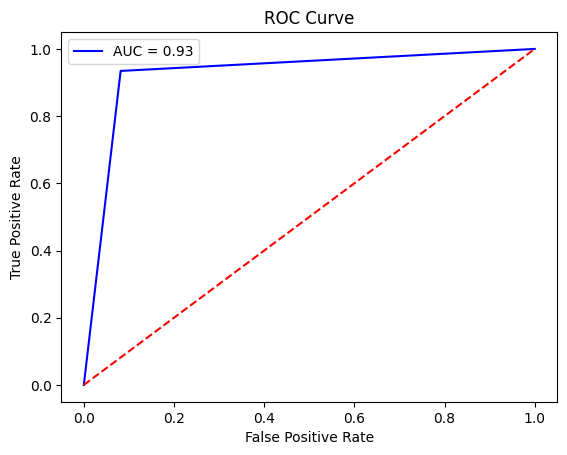

In [220]:
import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [221]:
for i in range(3,9):
    text = cleaned_df['review_comment'][i]
    is_positive = 'positive' if model.predict(vect.transform([text]))[0] else 'negative'
    print(f'{is_positive}: {text}')


positive: mas um pouco travando pelo valor ta boa
positive: super recomendo vendedor confiavel produto ok entrega antes do prazo
negative: gostaria de saber que houve sempre recebi essa compra agora me decpcionou
negative: nao chegou meu produto pessimo
positive: otimo loja nota
positive: obrigado pela atencao amim dispensada


# Investigate relevant words

In [222]:
# Get the feature names (words) from the CountVectorizer
feature_names = vect.get_feature_names_out()

# Get the coefficients from the logistic regression model
coef = model.coef_[0]

# Sort the coefficients in descending order
sorted_coef_index = coef.argsort()[::1]

# Print the top 10 words associated with negative sentiment
top_k = 30
print(f"-- Top {top_k} words associated with negative sentiment: --")
for i in range(top_k):
    print(feature_names[sorted_coef_index[i]])


-- Top 30 words associated with negative sentiment: --
pessimo
nao recomer
gostar saber
aguardar
cancelar
nao gostar
chatear
horrivel
bom gostar
insatisfeito
ruim
demor
resposta
defeito
bom produto bom
tristir
nao recomendo
nao chegar
nao entregar
nao
achar bom
incompleto
cancelei
cade
nao cumprir
lixo
desenho
danificar
rapir possivel
impossivel


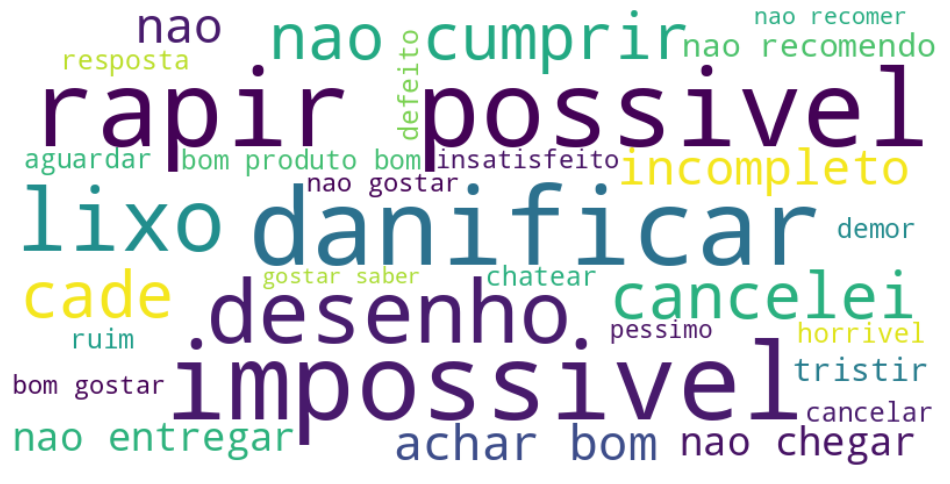

In [223]:
# Get the feature names (words) from the CountVectorizer
feature_names = vect.get_feature_names_out()

# Get the coefficients from the logistic regression model
coef = model.coef_[0]

# Sort the coefficients in descending order
sorted_coef_index = coef.argsort()[::1]

# Get the top k feature names and their coefficients
top_k_feature_coef = {feature_names[i]: coef[i] for i in sorted_coef_index[:top_k]}

# Create a frequency distribution of the top k words
word_freq = nltk.FreqDist(top_k_feature_coef)

# Create a word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


# Model statistics

In [224]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict the labels for the test data
y_pred = model.predict(vect.transform(x_test))

# Calculate the precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the precision, recall, and F1-score
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Precision: 0.927
Recall: 0.926
F1-score: 0.926


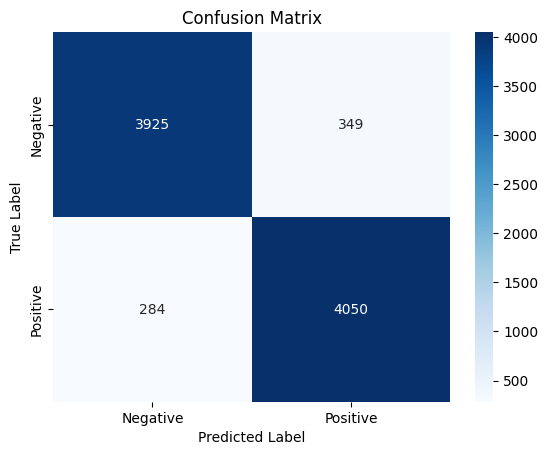

In [225]:
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define labels for the plot
labels = ['Negative', 'Positive']

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Plot the confusion matrix
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


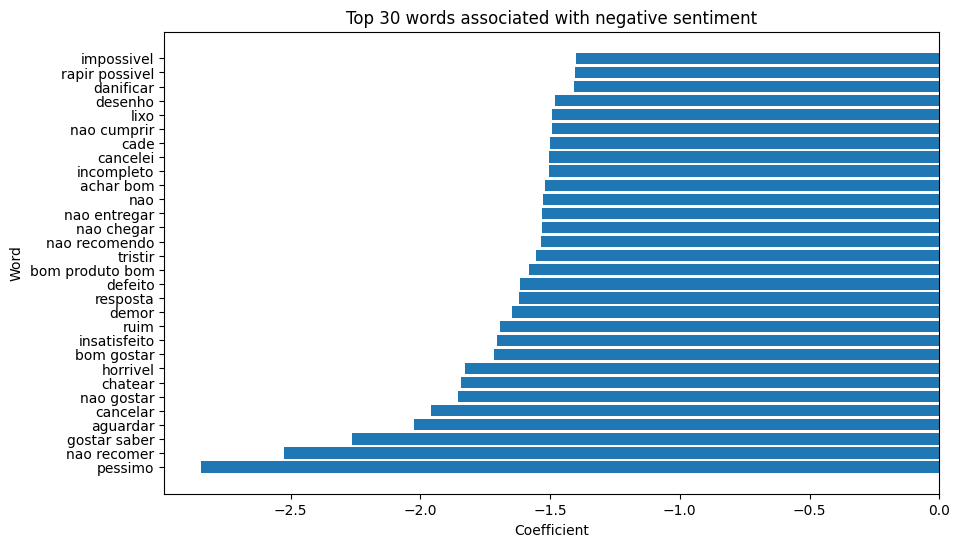

In [226]:
import matplotlib.pyplot as plt

# Get the feature names (words) from the CountVectorizer
feature_names = vect.get_feature_names_out()

# Get the coefficients from the logistic regression model
coef = model.coef_[0]

# Sort the coefficients in descending order
sorted_coef_index = coef.argsort()[::1]

# Get the top k feature names and their coefficients
top_k_feature_coef = {feature_names[i]: coef[i] for i in sorted_coef_index[:top_k]}

# Create lists of feature names and coefficients for plotting
words = list(top_k_feature_coef.keys())
weights = list(top_k_feature_coef.values())

# Create a horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(words, weights)
plt.title(f"Top {top_k} words associated with negative sentiment")
plt.xlabel("Coefficient")
plt.ylabel("Word")
plt.show()


In [227]:
y_test.iloc[1]

0

In [228]:
# Get the predicted probabilities for each test sample
probas = model.predict_proba(vect.transform(x_test))

# Create a list of tuples containing the predicted probabilities and the text reviews
probas_and_reviews = list(zip(probas[:, 1], x_test))

# Sort the list by predicted probability (in ascending order)
probas_and_reviews_sorted = sorted(probas_and_reviews, key=lambda x: x[0])

# Display the 5 reviews with the lowest predicted probabilities (worst classifications)
for i in range(10):
    print(f"Review #{i+1}")
    print(f"{probas_and_reviews_sorted[i][1]}\n")


Review #1
produto nao receber nao recebir produto fazer dia comprar agora aparecer compra pedir cancelar nao cancelei nada paguei primeira parcela exijo respeito ate porque brinquedo

Review #2
pessimo produto produto pessimo qualidade nao encaixa categoria capacho espessura fino material horrivel pessimo todo sentir nao comprar

Review #3
nao recebir pedir completo vir faltar jogo toalha comprar jogo nota fiscal aguardo solucao urgente faltar jogo vermelho fornecedor ibitinga decora aguardo solucao urgente

Review #4
nao recebir produto loja vender produto nao estoque nao resposta cliente lojar estelionato nunca recebir produto resposta nenhum reembolso

Review #5
produto incompleto compr cadeira todo vir faltar peca nao conseguir solicitar troco site erro conexao tambem nao conseguir telefone soliciitar Mail nao recebir retorno insatisfeito

Review #6
lixo produto vir errar nao nada ver descricao completamente insatisfeito querer dinheiro voltar nao recomer produto pelicular aler cor